# Part 1: ML Assignment

Mobile price:
•Data: https://raw.githubusercontent.com/nick-edu/dmmldl/master/MobilePrice.csv
•Description: https://raw.githubusercontent.com/nick-edu/dmmldl/master/MobilePriceColumns.
txt
Answer the following questions for your chosen dataset.

## 1.1 Exploratory Data Analysis
Perform exploratory data analysis on your chosen data set covering the following items.
1. How many rows and columns are there in your selected dataset? Are there any missing values in any of the columns?
2. Choose few columns from your dataset and describe them using various visualizations e.g. histograms, scatterplots etc.



In [107]:
#Subquestion 1

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import math

#import data

mobiledf= pd.read_csv('https://raw.githubusercontent.com/nick-edu/dmmldl/master/MobilePrice.csv')

#describe data

mobiledf.describe

<bound method NDFrame.describe of       battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      internal_me

In [36]:
#explore data sets

mobiledf.dtypes

battery_power        int64
bluetooth            int64
clock_speed        float64
dual_sim             int64
front_camera         int64
four_g               int64
internal_memory      int64
depth              float64
width                int64
n_cores              int64
primary_camera       int64
px_height            int64
px_width             int64
ram                  int64
screen_height        int64
screen_width         int64
talk_time            int64
three_g              int64
touch_screen         int64
wifi                 int64
price_range          int64
dtype: object

In [37]:
mobiledf.isnull().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
internal_memory    0
depth              0
width              0
n_cores            0
primary_camera     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [38]:
for column_name in mobiledf.columns:
    column = mobiledf[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  battery_power  is :  0
Count of zeros in column  bluetooth  is :  1010
Count of zeros in column  clock_speed  is :  0
Count of zeros in column  dual_sim  is :  981
Count of zeros in column  front_camera  is :  474
Count of zeros in column  four_g  is :  957
Count of zeros in column  internal_memory  is :  0
Count of zeros in column  depth  is :  0
Count of zeros in column  width  is :  0
Count of zeros in column  n_cores  is :  0
Count of zeros in column  primary_camera  is :  101
Count of zeros in column  px_height  is :  2
Count of zeros in column  px_width  is :  0
Count of zeros in column  ram  is :  0
Count of zeros in column  screen_height  is :  0
Count of zeros in column  screen_width  is :  180
Count of zeros in column  talk_time  is :  0
Count of zeros in column  three_g  is :  477
Count of zeros in column  touch_screen  is :  994
Count of zeros in column  wifi  is :  986
Count of zeros in column  price_range  is :  1000


In [39]:
for column_name in mobiledf.columns:
    column = mobiledf[column_name]
    countof1 = (column == 1).sum()
    countof0 = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', countof1+countof0)

Count of zeros in column  battery_power  is :  0
Count of zeros in column  bluetooth  is :  2000
Count of zeros in column  clock_speed  is :  61
Count of zeros in column  dual_sim  is :  2000
Count of zeros in column  front_camera  is :  719
Count of zeros in column  four_g  is :  2000
Count of zeros in column  internal_memory  is :  0
Count of zeros in column  depth  is :  106
Count of zeros in column  width  is :  0
Count of zeros in column  n_cores  is :  242
Count of zeros in column  primary_camera  is :  205
Count of zeros in column  px_height  is :  3
Count of zeros in column  px_width  is :  0
Count of zeros in column  ram  is :  0
Count of zeros in column  screen_height  is :  0
Count of zeros in column  screen_width  is :  390
Count of zeros in column  talk_time  is :  0
Count of zeros in column  three_g  is :  2000
Count of zeros in column  touch_screen  is :  2000
Count of zeros in column  wifi  is :  2000
Count of zeros in column  price_range  is :  2000


In [40]:
#following code will explore the records ouside of our assumptions table outlined in the report


In [49]:
#(mobiledf['px_height']==0).sum()

#selectedcolumns= ['px_height', 'screen_width']

#mobiledf[mobiledf['primary_camera'].eq(0).all(1)]
pd.set_option("display.max_rows", 15, "display.max_columns", None)

mobiledf.loc[mobiledf['primary_camera']==0]

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
7              1954          0          0.5         1             0       0   
33             1310          1          2.2         1             0       1   
52             1654          1          1.5         1             0       1   
54             1073          1          0.5         1             0       0   
62             1156          1          1.2         1             0       1   
...             ...        ...          ...       ...           ...     ...   
1906           1807          0          0.8         1             0       1   
1911           1259          0          1.2         1             0       0   
1931           1854          0          0.9         1             0       1   
1968           1667          0          1.0         1             0       1   
1993           1467          1          0.5         0             0       0   

      internal_memory  depth  width  n_cores  primary_camera  px_height  \
7                  24    0.8    187        4               0        512   
33                 51    0.6    100        4               0        178   
52                 43    0.3    109        2               0        546   
54                 51    0.5    145        7               0        690   
62                 50    0.8    159        2               0        322   
...               ...    ...    ...      ...             ...        ...   
1906               38    0.2     97        8               0       1332   
1911               13    0.5     97        2               0       1210   
1931               33    0.4    195        1               0        665   
1968               21    0.9    138        2               0       1211   
1993               18    0.6    122        5               0        888   

      px_width   ram  screen_height  screen_width  talk_time  three_g  \
7         1149   700             16             3          5        1   
33        1919  3845              7             0         12        1   
52         629  3112             12             5         10        1   
54         804  2908              6             0         18        0   
62         547   470              7             0         15        1   
...        ...   ...            ...           ...        ...      ...   
1906      1814  1069              7             6          7        1   
1911      1989   340             17            13          4        1   
1931       718  1675             14            12          9        1   
1968      1396   635             17             7         15        1   
1993      1099  3962             15            11          5        1   

      touch_screen  wifi  price_range  screen_area  
7                1     1            0           48  
33               1     0            1            0  
52               1     0            1           60  
54               1     0            1            0  
62               1     0            0            0  
...            ...   ...          ...          ...  
1906             0     0            0           42  
1911             0     1            0          221  
1931             0     1            0          168  
1968             0     0            0          119  
1993             1     1            1          165  

[101 rows x 22 columns]

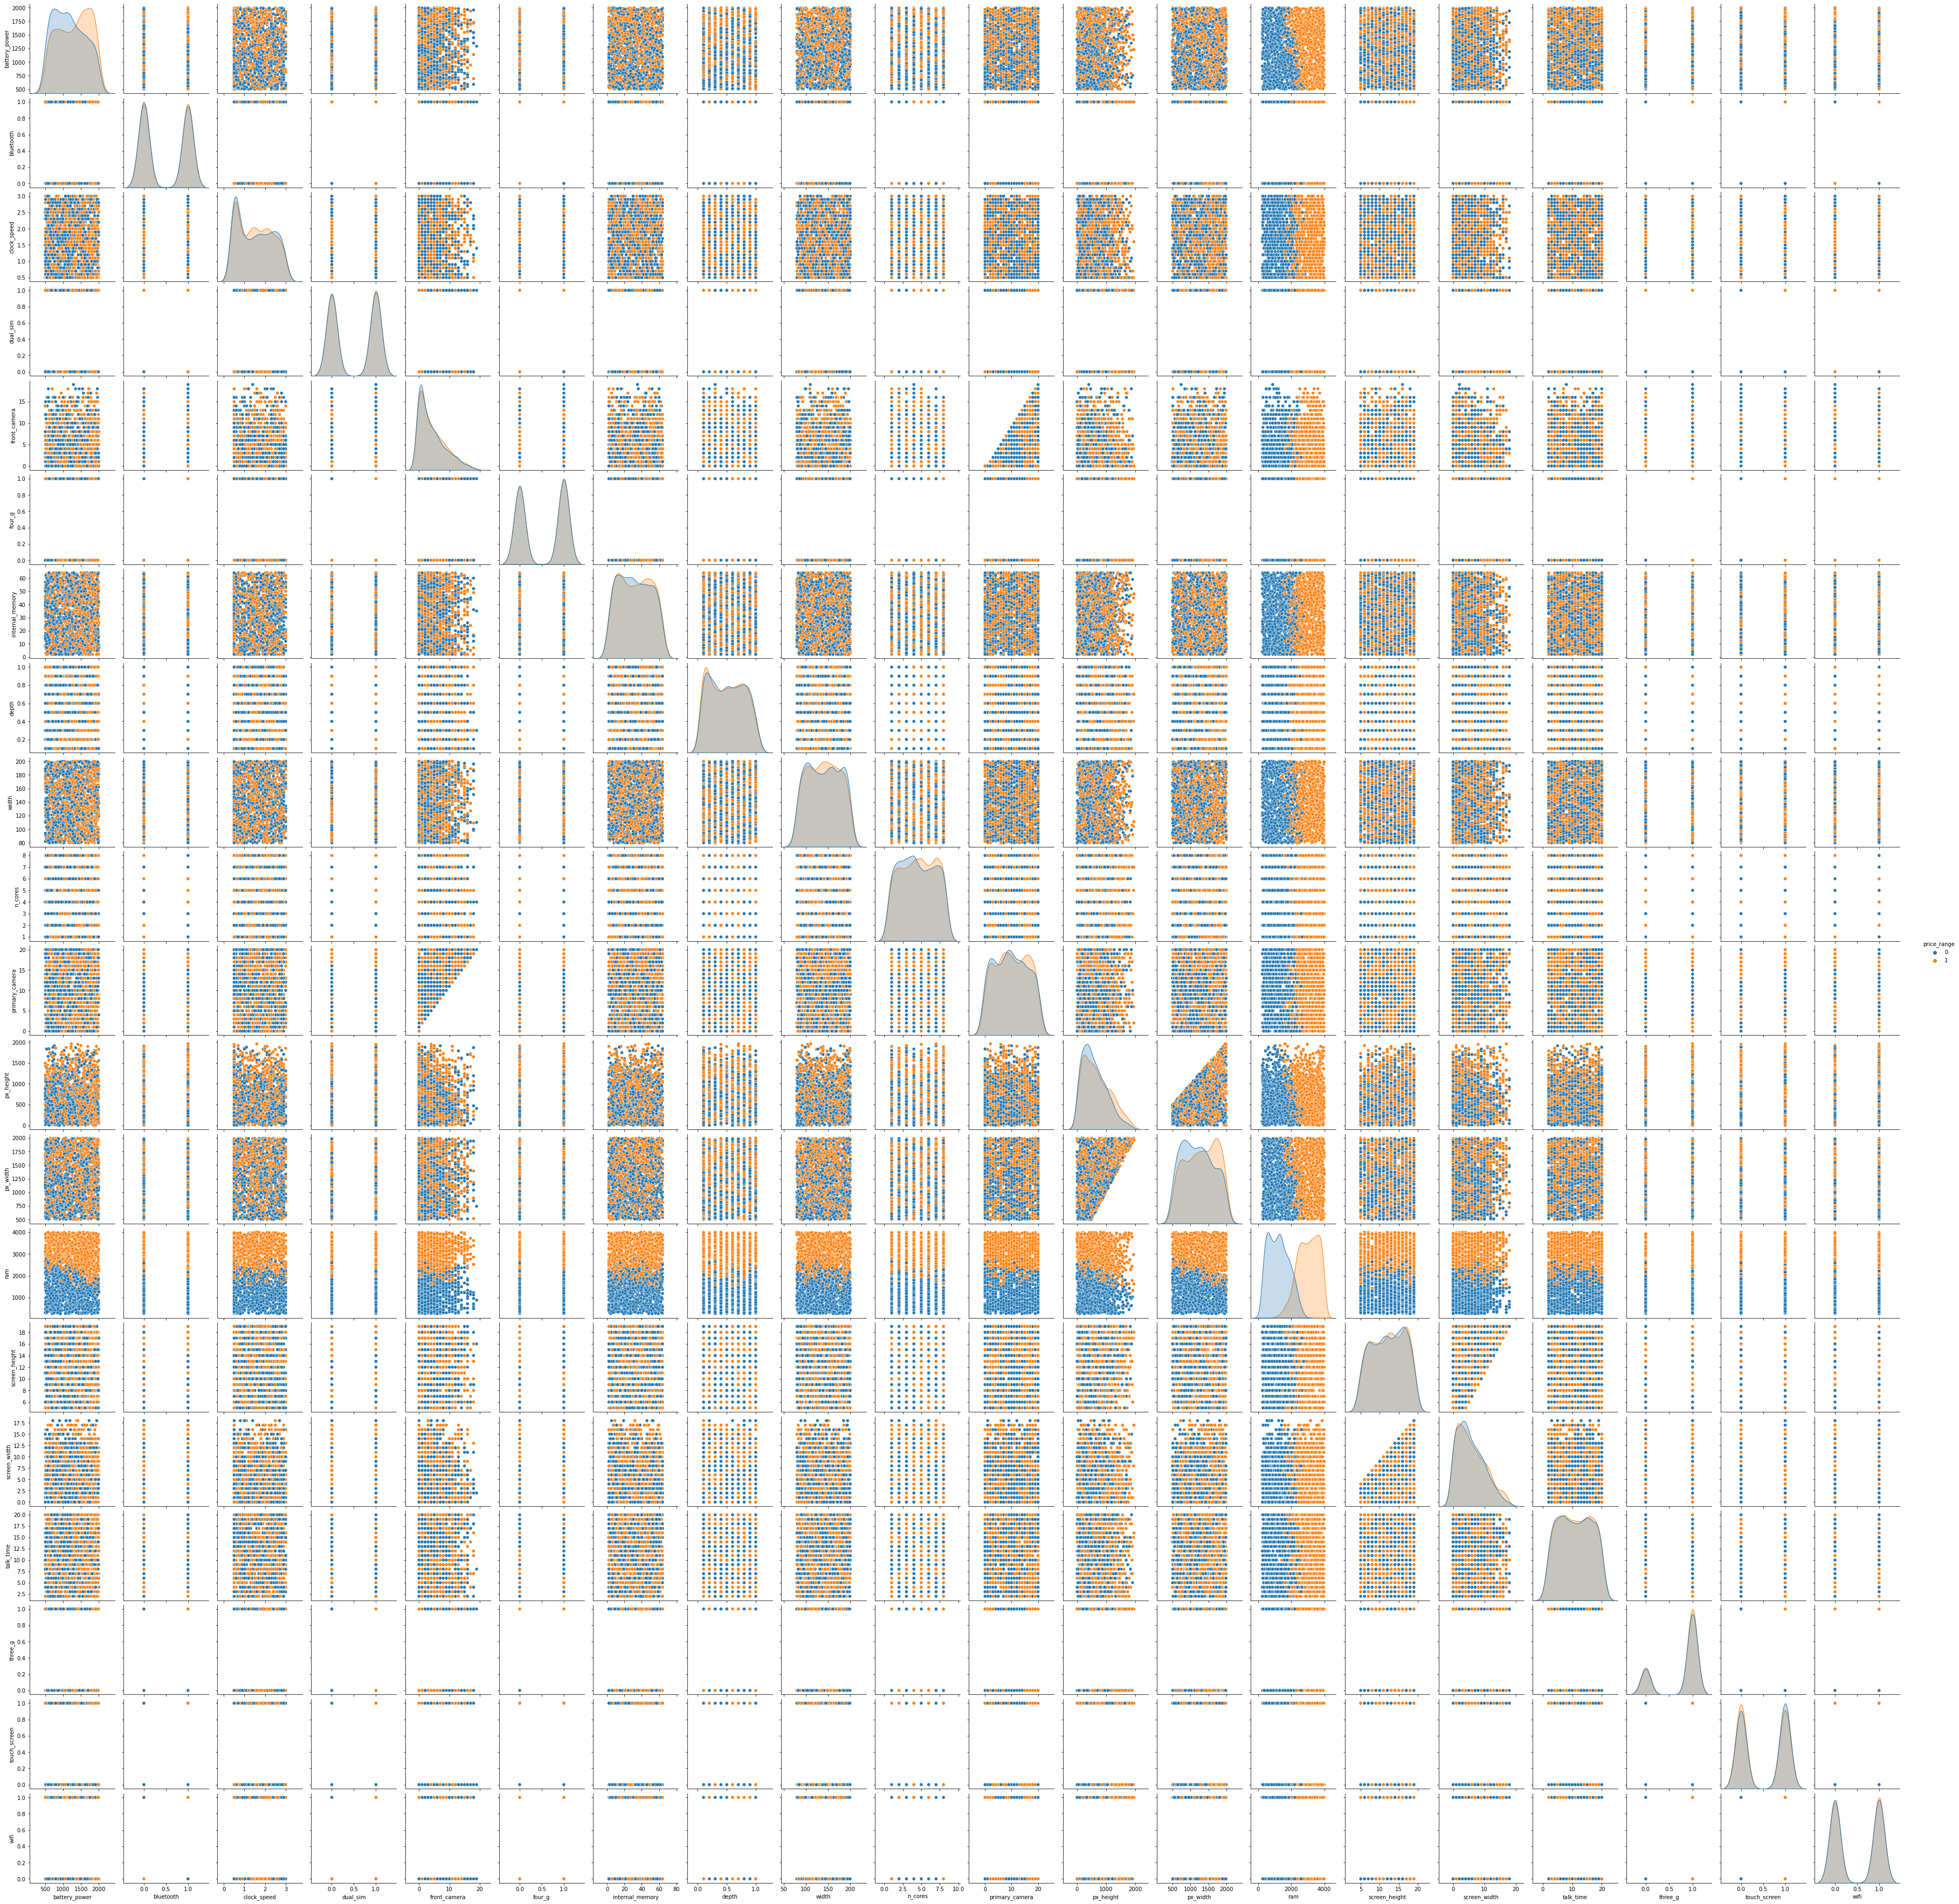

In [42]:
sns.pairplot(mobiledf, hue= "price_range")

In [72]:
#add new columns 
mobiledf2=mobiledf

mobiledf2['screen_area']= mobiledf.screen_height * mobiledf.screen_width

In [73]:
mobiledf2 = mobiledf2.astype({"depth": int, "front_camera": int, "internal_memory": int,"n_cores": int, "primary_camera": float, "ram": float, "px_height": float, "px_width": float, "talk_time": float, "screen_height": float, "screen_width": float})

In [74]:
mobiledf2.dtypes

battery_power      int64
bluetooth          int64
clock_speed      float64
dual_sim           int64
front_camera       int32
                  ...   
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
screen_area        int64
Length: 22, dtype: object

In [75]:
mobiledf2.rename(columns={"width": "weight"}, inplace= True)

In [76]:
mobiledf2["px_width2"]=mobiledf2["px_width"]**2
mobiledf2["px_height2"]=mobiledf2["px_height"]**2
mobiledf2["swin"]=mobiledf2["screen_width"]/2.54
mobiledf2["shin"]=mobiledf2["screen_height"]/2.54
mobiledf2["screen_width2"]=mobiledf2["swin"]**2
mobiledf2["screen_height2"]=mobiledf2["shin"]**2
mobiledf2["topf"]=mobiledf2["px_width"]/mobiledf2["px_height"]
mobiledf2["bottomf"]=mobiledf2["screen_width2"]/mobiledf2["screen_height2"]
mobiledf2["PPI"]=mobiledf2["topf"]/mobiledf2["bottomf"]

In [77]:
mobiledf2.drop(["px_width2","px_height2", "swin", "shin", "screen_width2", "screen_height2", "topf", "bottomf"], axis=1,inplace= True)


In [78]:
mobiledf2

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      internal_memory  depth  weight  n_cores  primary_camera  px_height  \
0                   7      0     188        2             2.0       20.0   
1                  53      0     136        3             6.0      905.0   
2                  41      0     145        5             6.0     1263.0   
3                  10      0     131        6             9.0     1216.0   
4                  44      0     141        2            14.0     1208.0   
...               ...    ...     ...      ...             ...        ...   
1995                2      0     106        6            14.0     1222.0   
1996               39      0     187        4             3.0      915.0   
1997               36      0     108        8             3.0      868.0   
1998               46      0     145        5             5.0      336.0   
1999               45      0     168        6            16.0      483.0   

      px_width     ram  screen_height  screen_width  talk_time  three_g  \
0        756.0  2549.0            9.0           7.0       19.0        0   
1       1988.0  2631.0           17.0           3.0        7.0        1   
2       1716.0  2603.0           11.0           2.0        9.0        1   
3       1786.0  2769.0           16.0           8.0       11.0        1   
4       1212.0  1411.0            8.0           2.0       15.0        1   
...        ...     ...            ...           ...        ...      ...   
1995    1890.0   668.0           13.0           4.0       19.0        1   
1996    1965.0  2032.0           11.0          10.0       16.0        1   
1997    1632.0  3057.0            9.0           1.0        5.0        1   
1998     670.0   869.0           18.0          10.0       19.0        1   
1999     754.0  3919.0           19.0           4.0        2.0        1   

      touch_screen  wifi  price_range  screen_area         PPI  
0                0     1            0           63   62.485714  
1                1     0            1           51   70.537999  
2                1     0            1           22   41.099762  
3                0     0            1          128    5.875000  
4                1     0            0           16   16.052980  
...            ...   ...          ...          ...         ...  
1995             1     0            0           52   16.336436  
1996             1     1            1          110    2.598525  
1997             1     0            1            9  152.294931  
1998             1     1            0          180    6.460714  
1999             1     1            1           76   35.221791  

[2000 rows x 23 columns]

In [ ]:
#We created a second set of data where the PPI and screen area was added and any phone with a screen area of 0 was removed from the dataset
#Because the data is stored as int instead of floats this datd has a possibility of being valid BUT the odds of a screen having a 
#dimension less than 1 centimeter is very low. 
#we also changed the column width to weight to match the data description

In [79]:
mobiledf2.loc[mobiledf2['screen_area']==0]
mobiledf3 = mobiledf2[mobiledf2.screen_area != 0]


In [96]:
mobiledf3.loc[mobiledf3['PPI']==np.inf]

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
1933            897          1          2.0         0             3       1   

      internal_memory  depth  weight  n_cores  primary_camera  px_height  \
1933                2      0     154        8            10.0        0.0   

      px_width     ram  screen_height  screen_width  talk_time  three_g  \
1933     994.0  1958.0            7.0           5.0        7.0        1   

      touch_screen  wifi  price_range  screen_area  PPI  
1933             1     0            0           35  inf

In [97]:
mobiledf3 = mobiledf3.drop(labels=1933, axis=0)

<AxesSubplot:>

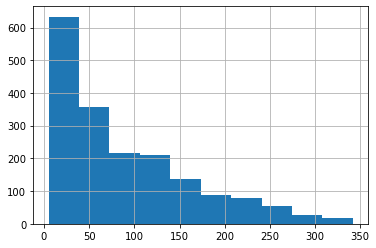

In [99]:
mobiledf3["screen_area"].hist()

KeyError: "None of [Float64Index([ 7.0,  3.0,  2.0,  8.0,  2.0,  1.0,  8.0,  3.0,  1.0, 10.0,\n              ...\n               3.0,  8.0,  3.0, 11.0, 16.0,  4.0, 10.0,  1.0, 10.0,  4.0],\n             dtype='float64', length=1819)] are in the [columns]"

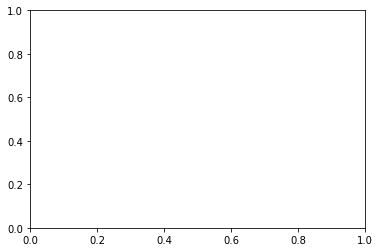

In [105]:
mobiledf3.plot.scatter(x = mobiledf3["screen_width"], y = mobiledf3["screen_height"])

## 1.2 Clustering
As part of this sub-question you will perform clustering on your chosen dataset from the above links. Choose one of the clustering algorithms that were discussed during the lecture for the application on your chosen dataset. Then choose few columns from your dataset that you think suitable for performing your chosen clustering. Describe and reflect on the clustering results and you are free to use the graphs/images and any other sort of visualizations also.

In [108]:
#Divide up the data set to a test, train, and 
X_train, X_test, y_train, y_test = train_test_split(mobiledf3.data, mobiledf3.target, test_size=0.2, random_state = 42)

#Iøve done something wrong but itøs probably the whole target thing. I need to remove it but I'm tired and will work on it later

AttributeError: 'DataFrame' object has no attribute 'data'

# Question 2
## 2.1 Principal Component Analysis
You need to download Olivetti faces dataset for this question and you can get it in one of the following ways.
1. Olivetti faces dataset download links
•Data: https://cs.nyu.edu/~roweis/data/olivettifaces.mat
•Images: https://cs.nyu.edu/~roweis/data/olivettifaces.gif
2. Dataset using Scikit-learn [1]: Use the sample code shown in listing 1.

a) Consider Olivetti faces dataset and use a classical dimensionality reduction technique (e.g. PCA) while preserving 99% of the variance. Then compute the reconstruction error for each image.

b) Next, take some of the images you built using the dimensionality reduction technique and modify/add some noise to some of the images using techniques such as rotate, flip, darken (you can use libraries such as scikit-image [2] etc. to do this) and look at their reconstruction error. You willnotice that how much larger the reconstruction error is.

c) Finally, plot all the 3 respective reconstructed images side by side (original image, image after PCA, image after PCA + noise) and compare the results.

2.2 Singular Value Decomposition
Find the singular values of the matrix Ashown below. The purpose of this assignment is to understand how to calculate the SVD for a given matrix. Therefore use a pen and paper to do the calculations, otherwise, if you are writing your own Python program, make sure to print/produce all the steps, so that we can verify your workings easily.

# Question 3
Write a brief extended abstract (of approximately 2-pages) containing your reflections on the appli-
cations of one of the following unsupervised machine learning techniques.
1. Dimensionality Reduction
2. Clustering

In order to answer the above question, you can also do a tiny literature review to find out how your chosen techniques is used across various domains to address/solve which kinds of problems. Also note that these techniques are old, quite popular and have laid foundation for many other machine learning/applied techniques. For example, recommender systems, customer segmentation, image segmentation etc. use internally/got inspired from the clustering technique. Therefore you have a several choices to write/shape your extended abstract and feel free to choose whatever the direction you want to explore. Furthermore, you can also reflect based on your experience in using the chosen techniques in your assignment, on their capabilities and limitations in terms of applying them on various datasets.

Finally, we would like to see more of your reflections and critical comments rather than just reproducing/reporting from what you have found in literature review. Your report should confirm to general formatting guidelines and academic standards that is expected for written projects at CBS and therefore also use a proper referencing/citations style (e.g. APA, MLA, Harvard etc. ) for your report.